# Experimentelle Arbeit INFM2100 WS 2021
## Prof. Grüning

**Gruppe 3:**
- Leon Schinski, 16800
- Lisa Schönfuß-Smith, 16793

**Die Aufgaben:**
1. Es soll ein Tik Tak Toe Spiel mit Jupyter Notebooks entwickelt werden, welches in den folgenden Aufgaben weiter verwendet werden soll.
Dazu gehören Tests und Kommentierter Code. 
2. Entwickle einen QLearner.
3. Entwickle ein neuronales Netzwerk. 

## Umsetzung
Der erste Schritt zur Umsetzung dieser Aufgaben, war es ein Klassendiagramm, ein Aktivitätsdiagramm und eine Sequenzdiagramm zu erstellen. Dieser Schritt fand statt, bevor die Programmierung los ging. Dabei wurden die Diagramme wiederholt ergänzt. Die Grundlagen der Diagrammarten und von 'plantuml' wurden in folgenden Vorträgen vorgestellt: 
- Klassendiagramm: Schinski
- Aktivitätsdiagramm: Schönfuß-Smith
- Sequenzdiagramm: Kubisch

In [2]:
import plantuml

### Klassendiagramm

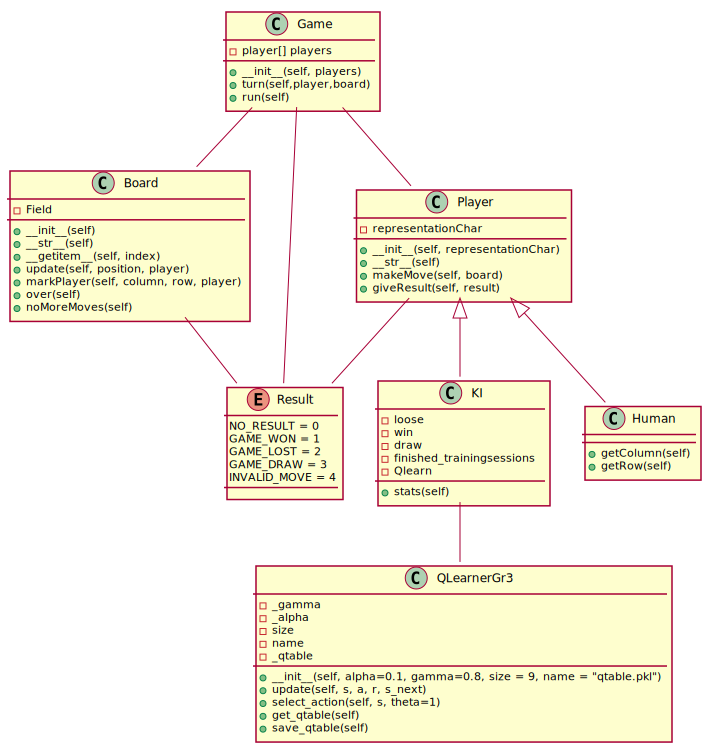

In [3]:
%%plantuml

class Game {
    -player[] players
    +__init__(self, players)
    +turn(self,player,board)
    +run(self)
    
}

class Board{
    -Field
    +__init__(self)
    +__str__(self)
    +__getitem__(self, index)
    +update(self, position, player)
    +markPlayer(self, column, row, player)
    +over(self)
    +noMoreMoves(self)
}

class Player{
    -representationChar
    +__init__(self, representationChar)
    +__str__(self)
    +makeMove(self, board)
    +giveResult(self, result)
}
class KI{
    -loose
    -win
    -draw
    -finished_trainingsessions
    -Qlearn
    +stats(self)
}

class QLearnerGr3{
    -_gamma 
    -_alpha
    -size
    -name
    -_qtable
    +__init__(self, alpha=0.1, gamma=0.8, size = 9, name = "qtable.pkl")
    +update(self, s, a, r, s_next)
    +select_action(self, s, theta=1)
    +get_qtable(self)
    +save_qtable(self)
}

class Human{
    +getColumn(self)
    +getRow(self)
}

enum Result{
    NO_RESULT = 0
    GAME_WON = 1
    GAME_LOST = 2
    GAME_DRAW = 3
    INVALID_MOVE = 4
}

Game -- Player
Game -- Board
Game -- Result

Player <|-- KI
Player <|-- Human
Player -- Result

Board -- Result

KI -- QLearnerGr3

Anhand dieses Klassendiagrammes wird in dem folgenden Abschnitt die Umsetzung der Aufgabe 1 und 2 erklärt.

### Die Game Klasse
Die Game Klasse ist dafür zuständig, ein neues Spiel zu generieren, welches gespielt werden kann. Dabei setzt sich das Game aus der Board Klasse und der Player Klasse zusammen. Diese beiden Klassen werden benötigt, um ein neues Spiel zu generieren. Diese Klasse enthält zusätzlich die Logik von dem Spiel und einem Zug, den ein Spieler machen kann. Wenn ein Zug nicht korrekt war, sendet das Game dem Spieler Feedback, dabei muss der Spieler dann erneut einen Zug machen, bis dieser korrekt ist. 
<table class="tg">
<thead>
  <tr>
    <th class="tg-pjk6"><br></th>
    <th class="tg-pjk6">A</th>
    <th class="tg-pjk6">B</th>
    <th class="tg-pjk6">C</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">X</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">O<br></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
</tbody>
</table>
Wenn jetzt Spieler 1 (X) in dem Feld 2 A ein Kreuz machen möchte und dieses Feld schon ausgefüllt wurde, ist dies zum Beispiel ein inkorrekter Zug. Wenn ein Zug gemacht wurde, überprüft das Spiel, ob das Spiel vorbei ist. Falls das Spiel nicht vorbei ist, ist der nächste Spieler dran mit seinem Zug. Falls das Spiel vorbei ist, bekommen die Spieler Feedback und das Spiel wird beendet.

#### __init__(self) Methode
Diese Methode initialisiert die Spieler. Dabei können diese ein menschlicher Spieler sein oder ein AI Spieler.

#### turn Methode
In dieser Methode wird, sobald ein Spieler einen Zug macht, überprüft, ob dieser korrekt ist. Wenn der Spieler einen inkorrekten Zug macht, dann bekommt er Feedback und muss seinen Zug erneut machen, bis dieser korrekt ist. 

#### run (self) Methode
Die Run Methode initialisiert ein neues Board für jedes Spiel, welches gespielt wird. Hier wird die Logik von dem Spiel festgehalten. Jeder Spieler hat seinen eigenen Zug, hinzu kommt, dass das Spiel solange läuft, bis es beendet wird. Nach einem korrekten Zug muss das Spiel überprüfen nach dem ''Game State''. In diesem Game State wird festgehalten, ob das Spiel beendet ist, wer gewonnen hat oder auch ob es ein unentschieden gibt. Wenn das Spiel beendet wird, bekommt jeder Spieler das Game State als Feedback.

### Die Board Klasse
Die Board Klasse enthält die Logik von dem ausgewählten Spiel. In diesem Fall Tik Tak Toe. Dabei wird als Spielfeld ein 3 x 3 Feld benutzt. Durch die die Spalte und Zeile kann auf die einzelnen Felder zugegriffen werden. In den einzelnen Felder wird dann das Spieler Objekt reingeschrieben. Wenn Spieler ein also den Zug 1 A macht, gibt das Feld 1 A Spieler 1 wieder. 

#### __init__(self) Methode
Diese Methode initialisiert das Board.

#### __str__(self) Methode
Die str Methode gibt das Field als String wieder.

#### __getitem__(self, index) Methode
Diese Methode ermöglicht es, das Feld von außerhalb der Klasse wiedergeben zu können. Dies wird in der momentanen Lösung jedoch noch nicht benutzt. 

#### update(self, position, player) Methode
Die Update Methode ist dafür zuständig, dass das Field aktuell bleibt, also geupdatet wird, sobald ein Spieler einen Zug macht. Dabei wird das Field geupdated und der aktive Spieler. Dazu kommt das, falls der Zug inkorrekt war 'false' zurückgegeben wird.

#### markPlayer(self, column, row, player) Methode
MarkPlayer ist eine Methode, die den aktuellen Player in das durch den Zug ausgewählte Feld schreibt.

#### over(self) Methode
Diese Methode überprüft, ob das Spiel vorbei ist. Dabei gibt es Gewinnbedingungen, die in dieser Methode festgehalten wird.
Bei der ersten Gewinnbedingung wird überprüft, ob eine Spalte 3 gleiche Spieler Objekte besitzt. 
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"><br></th>
    <th class="tg-0pky">A</th>
    <th class="tg-0pky">B</th>
    <th class="tg-0pky">C</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">X</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">X<br></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">X</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
</tbody>
</table>
Bei der zweiten Gewinnbedingung wird das Gleiche für die Zeile überprüft. 
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"><br></th>
    <th class="tg-0pky">A</th>
    <th class="tg-0pky">B</th>
    <th class="tg-0pky">C</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">X</td>
    <td class="tg-0pky">X</td>
    <td class="tg-0pky">X</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
</tbody>
</table>
Danach wird überprüft, ob Diagonal 3 gleiche Spieler Objekte sind. 
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"><br></th>
    <th class="tg-0pky">A</th>
    <th class="tg-0pky">B</th>
    <th class="tg-0pky">C</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">X</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">X</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">X</td>
  </tr>
</tbody>
</table>
Falls diese 3 Gewinnbedingungen nicht erfüllt wurden, wird die Methode noMoreMoves aufgerufen.
#### noMoreMoves(self) Methode
In dieser Methode wird überprüft, ob noch Züge möglich sind oder ob das Spielfeld schon voll ausgeführt ist.

### Die Player Klasse
Diese Klasse ist die Eltern Klasse von allen Spieler Klassen. Diese benutzt ''Decorators'' aus dem Vortrag von Herrn Büchner. 

#### __init__(self, representationChar) Methode
Diese Methode initialisiert den representationChar, dieser repräsentiert den Spieler auf dem Spielfeld.

#### __str__(self) Methode
Die str Methode gibt den Spieler auf dem Spielfeld als String wieder.

#### makeMove(self, board) Methode
Jeder Spieler besitzt die Fähigkeit, einen Zug zu machen. Hierfür ist die makeMove Methode.

#### giveResult(self, result) Methode
Die giveResult Methode gibt aus dem Result Enum ein Game State wieder. Diese muss ein Spieler bekommen und verarbeiten können. 

#### Die Human Klasse
Dies ist die Klasse für den menschlichen Spieler. Da diese Klasse von der Player Klasse erbt, kommen hier nur 2 Methoden hinzu. 

#### getColumn(self) Methode
In dieser Methode gibt der Spieler an, in welche Zeile er seinen Zug setzen möchte.

#### getRow(self) Methode
In dieser Methode gibt der Spieler an, in welche Spalte er seinen Zug setzen möchte.

#### Die Randy Klasse
Die Randy Klasse ist ein Spieler, der zufällig seine Züge auswählt.

#### Die KI Klasse
In diesem Notebook folgt die Umsetzung des lernenden Spielers mithilfe einer QTable. Dieser Spieler erbt wie der Menschliche Spieler und der Zufallsspieler von der abstracten Spieler Klasse. Die Spielerklasse bietet die zwei Methoden 
- makeMove()
- giveResult()
Weiterhin wurde bei diesem Spieler eine weitere Methode hinzugefügt.
- stats()
Diese Methoden vollenden den KIPlayer, sodass dieser übersichtlich und transparent fungiert.

##### init()
Die Methode zum initialisieren der Klasse beinhaltet folgende Variablen:
- state_next
- loose
- win
- draw
- finished_trainingsessions
- Qlearn
Diese werden für den kompletten Spielverlauf benötigt.  
Die Variable state_next beinhaltet hierbei den Status des Spielfelds. Da das Board am Anfang leer ist, wird die Variable anfangs auf None gesetzt.  
Die Variablen loose, win, draw und finished_trainingsessions sind hierbei für die stats methode gedacht. Anfangs werden die Werte auch hier mit 0 initialisiert.
Mit am wichtigsten ist die letzte Variable, diese ist der zugewiesene Qlearner. Dieser ist basierend auf den Namen des Spielers.

##### makeMove()
Diese Methode ist dazu da, damit der Spieler ein Feld auf dem Spielfeld auswählt, um dort seinen Zug zu machen. Dieser Spieler ist hierbei besonders, denn dieser Spieler speichert hierbei den aktuellen Status des Spielfelds ab und fragt dann den Qlearner, welcher Zug in diesem Zustand am besten wäre. Der Spieler bekommt eine Zahl zwischen 0 und 8 zurück vom QLearner. Diese entsprechen dann den Feldern auf dem Spielfeld und müssen nun noch in das Format: Spalte, Zeile konvertiert werden. Die getätigte Zug wird auch gespeichert, damit der Qlearner für diesen Zug weiter lernen kann.

##### giveResult()
In dieser Methode wird nun das bekommene Feedback vom Spiel verarbeitet. Der Spieler kann hierbei fünf Status zurückgebkommen:
- INVALID_MOVE
- GAME_LOST
- GAME_WON
- GAME_DRAW
- NO_RESULT
Basierend auf dem Feedback wird ein Reward für den Qlearner erstellt der für den letzten getätigten Zug gilt. Jeh besser das Feedback umso höher der Reward. Sobald der Reward feststeht wird der Qlearner aktualisiert.

##### stats()
Diese Methode ist für eine detaillierte Ansicht der trainingssessions. Hierbei wird dokumentiert wie oft der Spieler gewonnen, verloren oder ein Unentschieden erzielt hat. Sobald diese Methode aufgerufen wird, werden die Statistiken zurückgesetzt.

### Der Result Enum
In diesem Enum werden die möglichen Game States festgehalten. Dabei gibts es: 
- Kein Ergebnis, wenn das Spiel weitergeht und noch Züge existieren.
- Spiel gewonnen, wenn ein Spieler gewonnen hat.
- Spiel verloren, wenn ein Spieler verloren hat.
- Unentschieden, wenn keiner gewonnen oder verloren hat und keine Züge mehr möglich sind
- Inkorrekter Zug, wenn kein korrekter Zug gemacht wurde.

### Der QLearner
Dieses Notebook beinhalten die Funktionen für eine eine vollständige Qtable. Diese wird benutzt, damit ein automatischer Spieler das Spiel Tik Tak Toe "lernt". Das Notebook beinhaltet folgende Methoden:
- update()
- select_action()
- get_qtable()
- save_qtable()

#### init()
Zum Initialisieren des QLearners werden folgende Variablen gesetzt:
- gamma
- alpha
- size
- name
- qtable

Die Werte Gamma und Alpha sind für die spätere Update Funktion ein wichtiger Faktor. Die size bestimmt die Größe des zu initialisierenden Defaultdict, welches später als qtable verwendet wird. Der Name wird benötigt, damit eine Qtable immer zu einem Spieler zugeordnet werden kann. Die QTable wird hierbei auch direkt erstellt. Dabei wird jedoch eine Funktion aufgerufen, die den Prozess noch einmal auslagert.

#### update()
Diese Methode ist das Kernstück für das "lernen" des verbundenen Spielers. Diese Methode wird immer dann aufgerufen, wenn der Spieler Feedback bekommt. Daraufhin bekommt die Funktion das Spielfeld vor dem Zug, den ausgeführten Zug, die Belohnung für den Zug und das Spielfeld nach dem Zug. Daraufhin wird ein neuer Eintrag erzeugt oder ein bereits bestehender bearbeitet. Für den Zug in diesem Zustand wird dann ein Wert eingetragen, der durch die Q-Formel berechnet wird. Das kann dann wie folgt aussehen:
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-amwm">Spielfeldzustand</th>
    <th class="tg-amwm">0</th>
    <th class="tg-amwm">1</th>
    <th class="tg-amwm">2</th>
    <th class="tg-amwm">3</th>
    <th class="tg-amwm">4</th>
    <th class="tg-amwm">5</th>
    <th class="tg-amwm">6</th>
    <th class="tg-amwm">7</th>
    <th class="tg-amwm">8</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-amwm">o | - | -<br>- | - | -<br>- | - | -</td>
    <td class="tg-baqh">-1</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
  </tr>
  <tr>
    <td class="tg-amwm"><span style="font-style:normal;text-decoration:none">o | - | o</span><br><span style="font-style:normal;text-decoration:none">- | x | -</span><br><span style="font-style:normal;text-decoration:none">- | - | -</span></td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">-1</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">-75</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
  </tr>
  <tr>
    <td class="tg-amwm"><span style="font-style:normal;text-decoration:none">o | o | o</span><br><span style="font-style:normal;text-decoration:none">- | x | -</span><br><span style="font-style:normal;text-decoration:none">- | - | x</span></td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">100</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
    <td class="tg-baqh">0</td>
  </tr>
</tbody>
</table>

Wenn die Tabelle schon gefüllter ist, können die Einträge wie folgt aussehen:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-amwm">Spielfeldzustand</th>
    <th class="tg-amwm">0</th>
    <th class="tg-amwm">1</th>
    <th class="tg-amwm">2</th>
    <th class="tg-amwm">3</th>
    <th class="tg-amwm">4</th>
    <th class="tg-amwm">5</th>
    <th class="tg-amwm">6</th>
    <th class="tg-amwm">7</th>
    <th class="tg-amwm">8</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-amwm">- | o | -<br>- | - | -<br>- | - | -</td>
    <td class="tg-baqh">812.43850059</td>
    <td class="tg-baqh">94.23252294</td>
    <td class="tg-baqh">641.19653717</td>
    <td class="tg-baqh">697.37119324</td>
    <td class="tg-baqh">529.14289562</td>
    <td class="tg-baqh">336.78619794</td>
    <td class="tg-baqh">780.72492767</td>
    <td class="tg-baqh">503.26530498</td>
    <td class="tg-baqh">447.60086725</td>
  </tr>
  <tr>
    <td class="tg-amwm"><span style="font-style:normal;text-decoration:none">- | o | -</span><br><span style="font-style:normal;text-decoration:none">- | x | -</span><br><span style="font-style:normal;text-decoration:none">o | - | x</span></td>
    <td class="tg-baqh">1802.52716264</td>
    <td class="tg-baqh">118.3510557</td>
    <td class="tg-baqh">343.11601993</td>
    <td class="tg-baqh">576.06448356</td>
    <td class="tg-baqh">1583.33019239</td>
    <td class="tg-baqh">277.72010963</td>
    <td class="tg-baqh">162.22091945</td>
    <td class="tg-baqh">266.33470835</td>
    <td class="tg-baqh">583.0558422</td>
  </tr>
  <tr>
    <td class="tg-amwm"><span style="font-style:normal;text-decoration:none">- | o | -</span><br><span style="font-style:normal;text-decoration:none">x| o | -</span><br><span style="font-style:normal;text-decoration:none">o | - | x</span></td>
    <td class="tg-baqh">-445.2750215</td>
    <td class="tg-baqh">-489.23853967</td>
    <td class="tg-baqh">-348.13559539</td>
    <td class="tg-baqh">-438.19954086</td>
    <td class="tg-baqh">-689.12900591</td>
    <td class="tg-baqh">-368.29800038</td>
    <td class="tg-baqh">-568.30030149</td>
    <td class="tg-baqh">-735.91078774</td>
    <td class="tg-baqh">-490.14535125</td>
  </tr>
</tbody>
</table>

#### select_action()
Diese Methode ist dafür da, um für den Spieler eine Position auszuwählen. In dieser Umsetzung wird dabei ein Epsilon-greedy Verfahren genutzt. Vorher wird dabei ein epsilon-Wert festgesetzt und danach wird eine Zahl zufällig generiert. Wenn die Zahl kleiner als das espilon ist, wird ein zufälliger Zug ausgefählt, ist die Zahl jedoch größer als das Epsilon, wird der best mögliche Zug ausgewählt. Sollten dabei verschiedne Züge den gleichen Wert besitzen, wird der erste gewählt, der erkannt wird. Für das Training ist diese Methode idealer, da der Spieler nun nicht immer die besten Züge wählt und die Spiele mehr Möglichkeiten besitzen. So ist es nicht möglich eine Strategie immer und immer wieder zu wiederholen und keine neuen Status mehr zu erkennen. Wenn der Spieler nun Kompetetiv genutzt werden soll, muss natürlich der zufallswert herausgenommen werden und durch einen Wert ausgetauscht werden, der immer größer ist als epsilon.

#### get_qtable()
Diese Funktion ist dafür da, um eine qtable zu erstellen. Dabei wird vorher überprüft, ob es bereits eine Datei gibt, die eine Tabelle mit dem entsprchenden Namen existiert. Sollte diese vorhanden sein, so wird diese geladen und weiterhin benutzt. Wenn nun keine vorhanden ist, so wird eine neue Tabelle erstellt, mit der angegeben größe vom Anfang.

#### save_qtable()
Diese Methode ist dafür da, um die vorhandene Tabelle zu speichern, damit diese später wieder geladen werden kann.


### Statistiken
In den folgenden Diagrammen sieht man die Ergebnisse von 800 Tausend Spielen. Dabei haben bei den ersten 400 Tausend Spielen ein Randy Spieler und eine AI gegeneinander gespielt. Hierbei kann man sehen das, wenn die AI den ersten Zug im Spiel macht, das diese dann auch mehr gewinnt. Bei den competetive Spielen wird immer der beste Zug gewählt. 

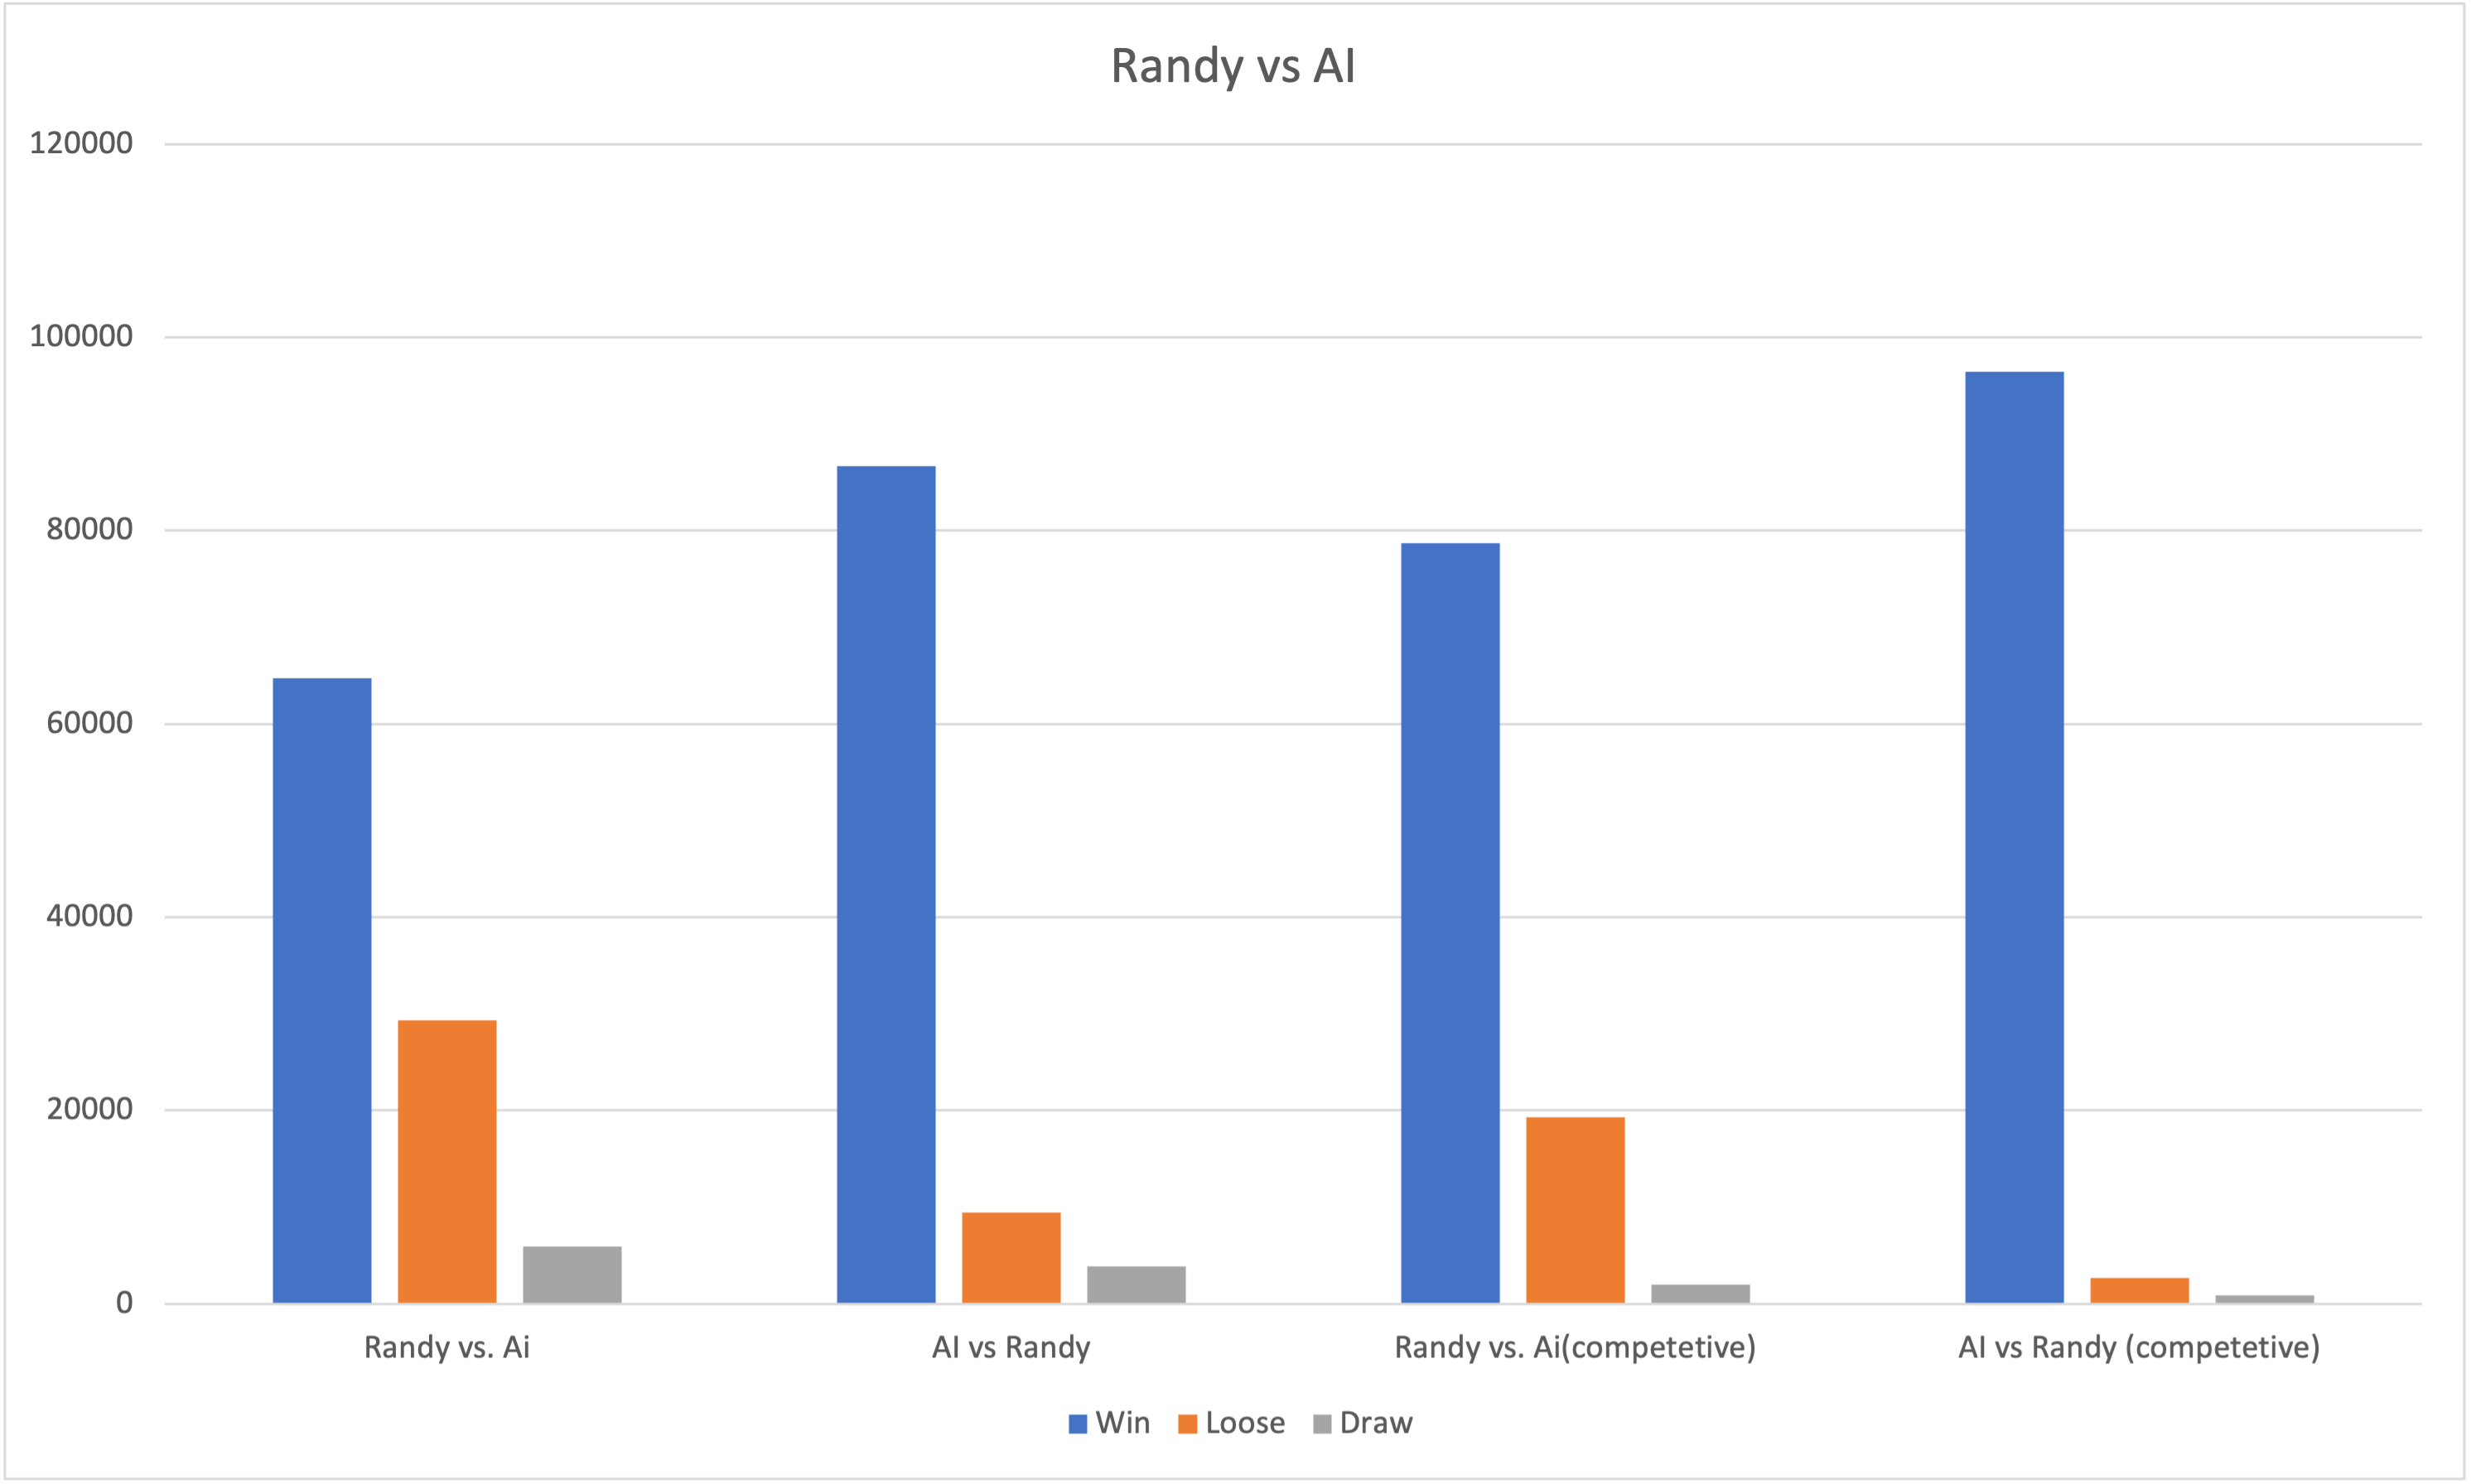

In dem folgenden Diagramm können die Ergebnisse aus 400 Tausend Spiele betrachett werden. Hierbei ist zu erkennen, das bei den ersten 200 tausend Spielen meist der Gewinnt, der anfängt. Bei den 200 Tausend letzten Spielen sieht man das die learned AI 100% der Spiele gewinnt.

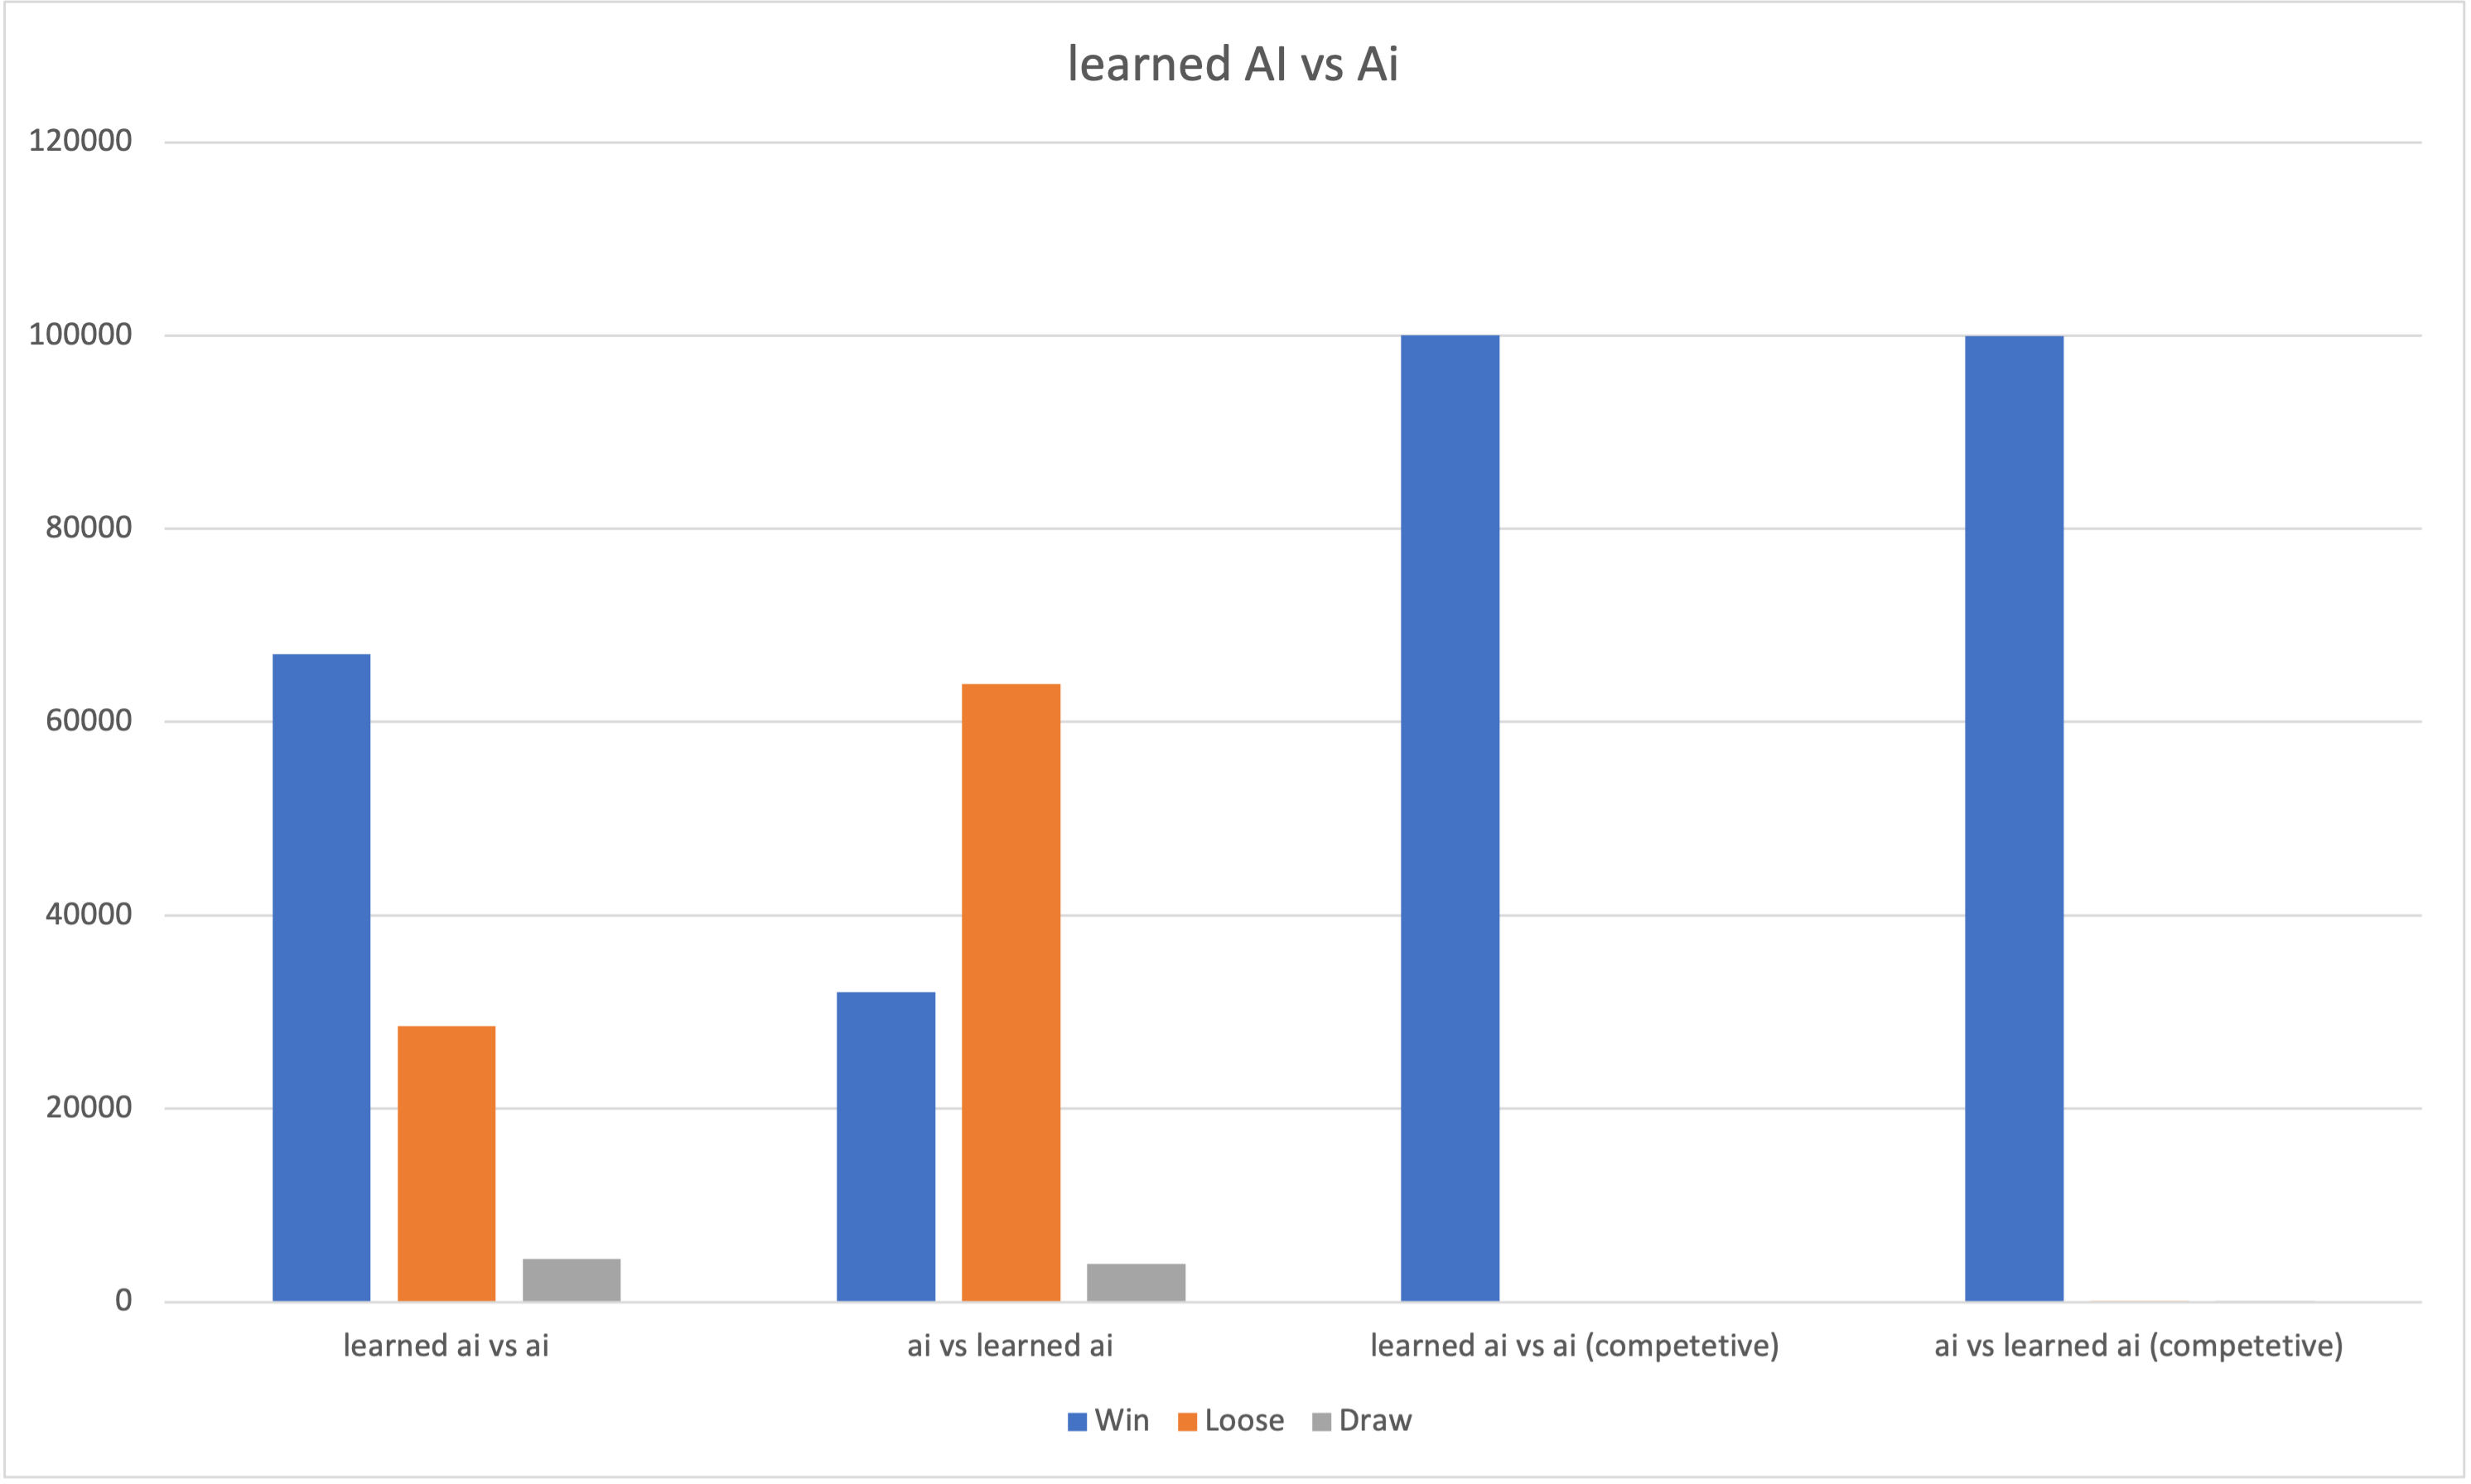

### Aktivitätsdiagramm
Zusätzlich wurde für das Projekt ein Aktivitätsdiagramm erstellt, um die Abläufe des Spiels besser darstellen zu können.

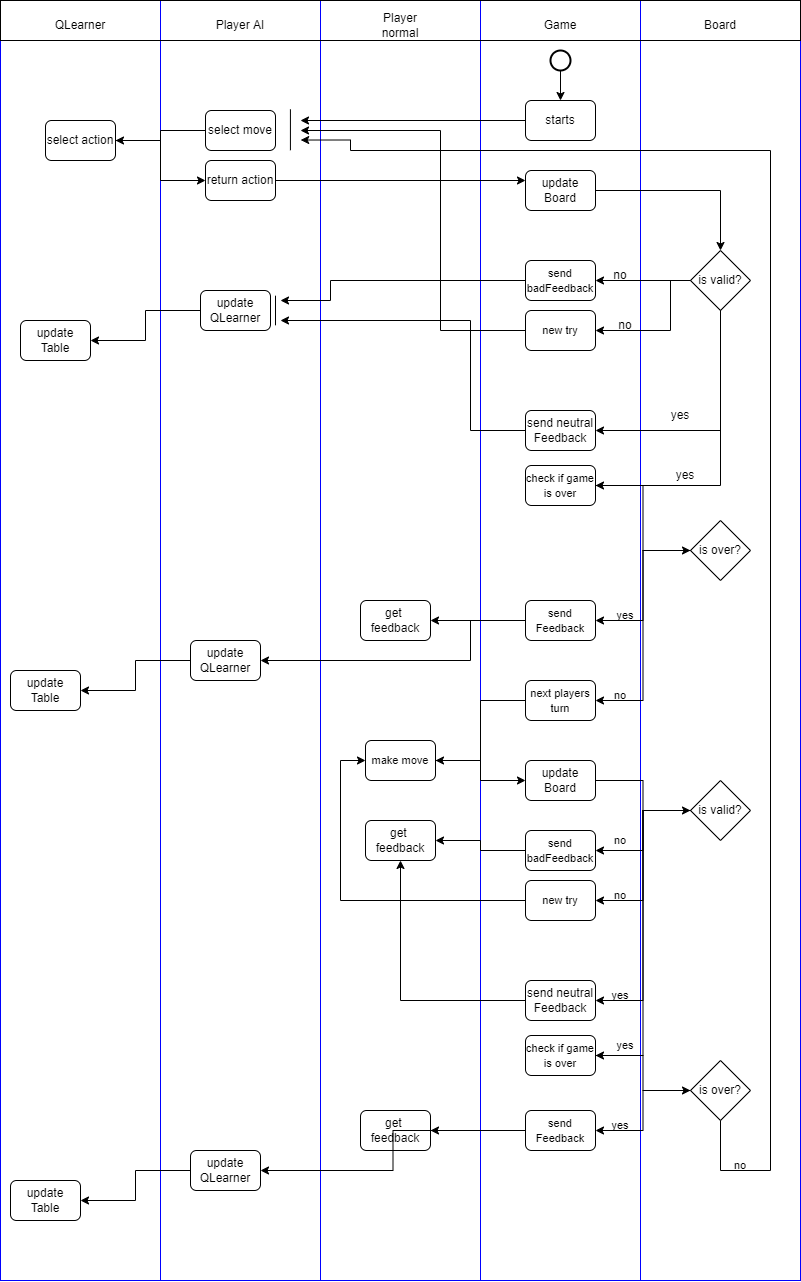

### Sequenzdiagram
Als nächstes wurde für das Projekt ein Sequenzdiagramm erstellt. Hierbei wurde erst eins ohne einer AI erstellt.

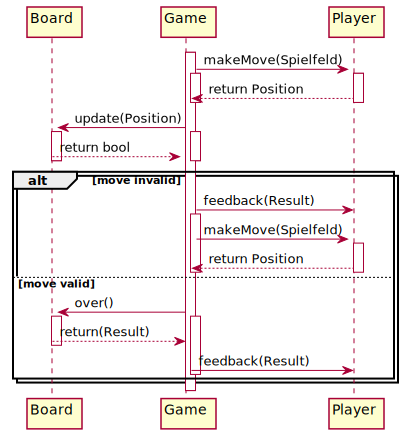

In [4]:
%%plantuml
participant Board
participant Game
participant Player

activate Game
Game -> Player: makeMove(Spielfeld)
activate Game
activate Player
return return Position
deactivate Game

Game -> Board: update(Position)
activate Game
activate Board
return return bool
deactivate Game

alt move invalid
    Game -> Player: feedback(Result)
    activate Game
    Game -> Player: makeMove(Spielfeld)
    activate Player
    return return Position
    deactivate Game

else move valid
    Game -> Board: over()
    activate Game
    activate Board
    return return(Result)

    Game -> Player: feedback(Result)
    deactivate Game

end

### Sequenzdiragramm mit einer AI
Dann wurde ein Sequenzdiragramm mit einer AI erstellt.

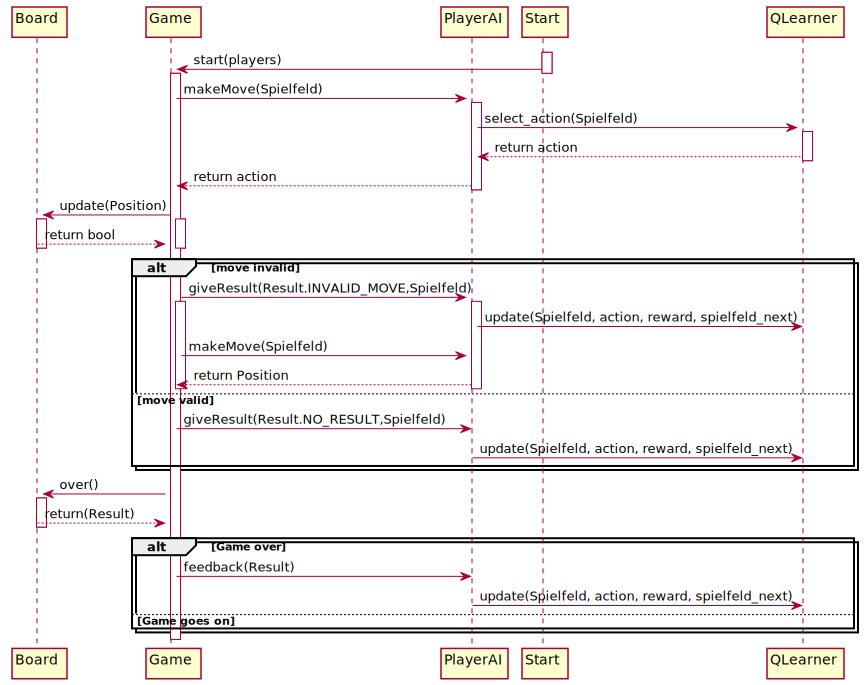

In [5]:
%%plantuml
participant Board
participant Game
participant PlayerAI
participant Start
participant QLearner

activate Start
Start -> Game: start(players)
deactivate Start
activate Game
Game -> PlayerAI: makeMove(Spielfeld)
activate PlayerAI
PlayerAI -> QLearner:select_action(Spielfeld)
activate QLearner
return return action
deactivate QLearner
PlayerAI --> Game: return action
deactivate PlayerAI

Game -> Board: update(Position)
activate Game
activate Board
return return bool
deactivate Game

alt move invalid
    Game -> PlayerAI: giveResult(Result.INVALID_MOVE,Spielfeld)
    activate Game
    activate PlayerAI
    PlayerAI -> QLearner:update(Spielfeld, action, reward, spielfeld_next)
    Game -> PlayerAI: makeMove(Spielfeld)
    return return Position
    deactivate Game

else move valid
    Game -> PlayerAI: giveResult(Result.NO_RESULT,Spielfeld)
    PlayerAI -> QLearner:update(Spielfeld, action, reward, spielfeld_next)
end
    
    activate Game
    Game -> Board: over()
    activate Board
    return return(Result)

alt Game over
    Game -> PlayerAI: feedback(Result)
    PlayerAI -> QLearner:update(Spielfeld, action, reward, spielfeld_next)
else Game goes on
end
    deactivate Game
    

Die Aufgabe 3: Entwickle ein neuronales Netzwerk haben wir nicht geschafft.